<a href="https://colab.research.google.com/github/Reinaldo0/classificacao-titanic/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Treinando o modelo com max_depth = 3 e criterion = 'gini'


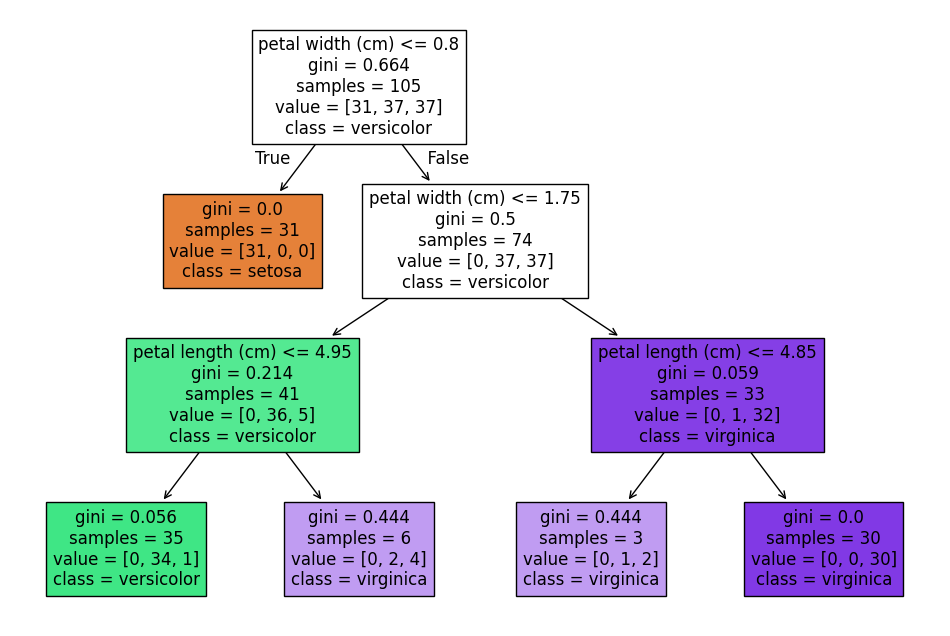

Avaliação do modelo inicial:
Acurácia: 1.0
Matriz de Confusão:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Testando diferentes profundidades com 'gini'

--- Testando com max_depth = 2, criterion = gini ---
Acurácia: 0.9777777777777777
Matriz de Confusão:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Função para carregar e dividir o dataset
def carregar_dados(test_size=0.3):
    iris = load_iris()
    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test, iris

# Função para treinar o modelo de árvore de decisão
def treinar_arvore(X_train, y_train, criterion='gini', max_depth=3):
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    model.fit(X_train, y_train)
    return model

# Função para visualizar a árvore de decisão
def visualizar_arvore(model, iris):
    plt.figure(figsize=(12, 8))
    tree.plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
    plt.show()

# Função para avaliar o modelo
def avaliar_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

    return y_pred

# Função para testar diferentes valores de max_depth e criterion
def testar_parametros(X_train, X_test, y_train, y_test, depths=[2, 3, 5, 10], criterion='gini'):
    for depth in depths:
        print(f"\n--- Testando com max_depth = {depth}, criterion = {criterion} ---")
        model = treinar_arvore(X_train, y_train, criterion=criterion, max_depth=depth)
        avaliar_modelo(model, X_test, y_test)

def main():
    # Carregar e dividir os dados
    X_train, X_test, y_train, y_test, iris = carregar_dados()

    # Treinar e visualizar a árvore de decisão inicial
    print("Treinando o modelo com max_depth = 3 e criterion = 'gini'")
    model = treinar_arvore(X_train, y_train, max_depth=3)

    # Visualizar a árvore
    visualizar_arvore(model, iris)

    # Avaliar o modelo
    print("Avaliação do modelo inicial:")
    avaliar_modelo(model, X_test, y_test)

    # Testar diferentes valores de max_depth e criterions
    print("\nTestando diferentes profundidades com 'gini'")
    testar_parametros(X_train, X_test, y_train, y_test, depths=[2, 3, 5, 10], criterion='gini')

    print("\nTestando diferentes profundidades com 'entropy'")
    testar_parametros(X_train, X_test, y_train, y_test, depths=[2, 3, 5, 10], criterion='entropy')

# Executar a função principal
main()
